# This model uses Convolutional Neural Network(CNN).

## Modeling process

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, RandomFlip, RandomRotation, Resizing, Rescaling, BatchNormalization, SeparableConv2D, Input, Dropout, GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator



# Define som key parameters

In [2]:
Batch_size = 32
Img_W = 256
Img_H = 256
Epoch = 5
Channels = 3

Input_shape = [Batch_size, Img_H, Img_W, Channels]

# Define dataset

In [3]:
# train_path = 'Shudan_PythonKurs/Project/dataset/Train'
# valid_path = 'Shudan_PythonKurs/Project/dataset/Validation'
# test_path = 'Shudan_PythonKurs/Project/dataset/Test'

In [4]:
Train_data = keras.utils.image_dataset_from_directory(
    '/Shudan_PythonKurs/Project/dataset/Train',
    labels='inferred',
    label_mode='categorical',
    seed=123,
    shuffle=True
)
Validation_data = keras.utils.image_dataset_from_directory(
    '/Shudan_PythonKurs/Project/dataset/Validation',
    labels='inferred',
    label_mode='categorical',
    seed=123,
    shuffle=True
    )
Test_data = keras.utils.image_dataset_from_directory(
    '/Shudan_PythonKurs/Project/dataset/Test',
    labels='inferred',
    label_mode='categorical',
    shuffle=True
)

Found 1400 files belonging to 4 classes.
Found 400 files belonging to 4 classes.
Found 500 files belonging to 4 classes.


In [5]:
classes = Train_data.class_names
classes

['forest', 'freeway', 'residential', 'river']

In [6]:
class_indices = {}

# Iterate over the dataset to collect the class indices
for images, labels in Train_data:
    for i, class_name in enumerate(Train_data.class_names):
        class_indices[class_name] = i
    break  

print(class_indices)

{'forest': 0, 'freeway': 1, 'residential': 2, 'river': 3}


# Model building

In [7]:
# Define augmentation layer which will be used in the model

augmentation = Sequential([
    Resizing(Img_W, Img_H),
    Rescaling(1.0/255),
    RandomFlip(mode = "horizontal_and_vertical"),
    RandomRotation(0.1),
])

In [8]:
for data_batch, label_batch in Train_data:
    print('Data Shape:', data_batch.shape)
    print('Label Shape:', label_batch.shape)
    break

Data Shape: (32, 256, 256, 3)
Label Shape: (32, 4)


In [9]:
# Define a Convolutional Neural Network(CNN) model with several convolutional layers, 1 flatten layer and 2 dense layers. The final layer will have softmax activation because it is a a multiclass classification model.

model = Sequential([
    
    
    Input(shape=(256,256,3)),
    
    augmentation,
    
    Conv2D(32, kernel_size=(3,3), activation='relu', padding = 'same'),
    MaxPooling2D((2,2), strides=2),
    BatchNormalization(),
    
    Conv2D(64, kernel_size=(3,3), activation='relu',padding = 'same'),
    Conv2D(128, kernel_size=(3,3), activation='relu',padding = 'same'),
    Dropout(0.5),
    MaxPooling2D((2,2),strides=2),
    
    
    Conv2D(128, kernel_size=(3,3), activation='relu',padding = 'same'),
    Conv2D(128, kernel_size=(3,3), activation='relu',padding = 'same'),
    Dropout(0.5),
    GlobalAveragePooling2D(),
    
    Flatten(),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
    
])

call_back = EarlyStopping(monitor='loss', patience = 5, mode='min')

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss= 'categorical_crossentropy',
    metrics= ['accuracy']
)


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 422,596 (1.61 MB)

 Trainable params: 422,532 (1.61 MB)

 Non-trainable params: 64 (256.00 B)

In [10]:
CNN_model = model.fit(x=Train_data, epochs=50, batch_size=Batch_size, verbose=2, validation_data=Validation_data, callbacks=call_back)

Epoch 1/50
44/44 - 291s - 7s/step - accuracy: 0.3986 - loss: 1.2852 - val_accuracy: 0.2650 - val_loss: 1.3702
Epoch 2/50
44/44 - 320s - 7s/step - accuracy: 0.5021 - loss: 1.0989 - val_accuracy: 0.4150 - val_loss: 1.3363
Epoch 3/50
44/44 - 312s - 7s/step - accuracy: 0.5729 - loss: 1.0361 - val_accuracy: 0.3975 - val_loss: 1.3312
Epoch 4/50
44/44 - 321s - 7s/step - accuracy: 0.5821 - loss: 1.0028 - val_accuracy: 0.4675 - val_loss: 1.3003
Epoch 5/50
44/44 - 320s - 7s/step - accuracy: 0.5929 - loss: 0.9766 - val_accuracy: 0.5200 - val_loss: 1.2551
Epoch 6/50
44/44 - 323s - 7s/step - accuracy: 0.6086 - loss: 0.9371 - val_accuracy: 0.6000 - val_loss: 1.2098
Epoch 7/50
44/44 - 320s - 7s/step - accuracy: 0.6343 - loss: 0.8786 - val_accuracy: 0.6650 - val_loss: 1.1583
Epoch 8/50
44/44 - 325s - 7s/step - accuracy: 0.6443 - loss: 0.8493 - val_accuracy: 0.6325 - val_loss: 1.1150
Epoch 9/50
44/44 - 325s - 7s/step - accuracy: 0.6664 - loss: 0.8396 - val_accuracy: 0.6075 - val_loss: 1.0921
Epoch 10/5

# Evaluating model

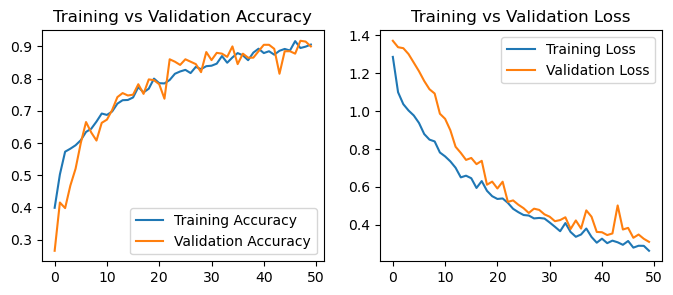

In [11]:
# Accuracy and loss curve

plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(CNN_model.history['accuracy'], label='Training Accuracy')
plt.plot(CNN_model.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(CNN_model.history['loss'], label='Training Loss')
plt.plot(CNN_model.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


In [13]:
# Evaluate model on test data

test_score = model.evaluate(Test_data)
print(f'Test accuracy: {round((test_score[1]*100), 2)}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.9446 - loss: 0.2523
Test accuracy: 95.8


In [15]:
model.save('CNN_model.keras')

# Visualize test data with actual labels and predicted labels

In [28]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [29]:
predictions = probability_model.predict(Train_data)

44/44 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step


In [30]:
predictions[0]

array([0.17653169, 0.17763844, 0.17623009, 0.46959975], dtype=float32)

In [31]:
np.argmax(predictions[0])

3

In [34]:
label_batch[0]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 0., 1., 0.], dtype=float32)>

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


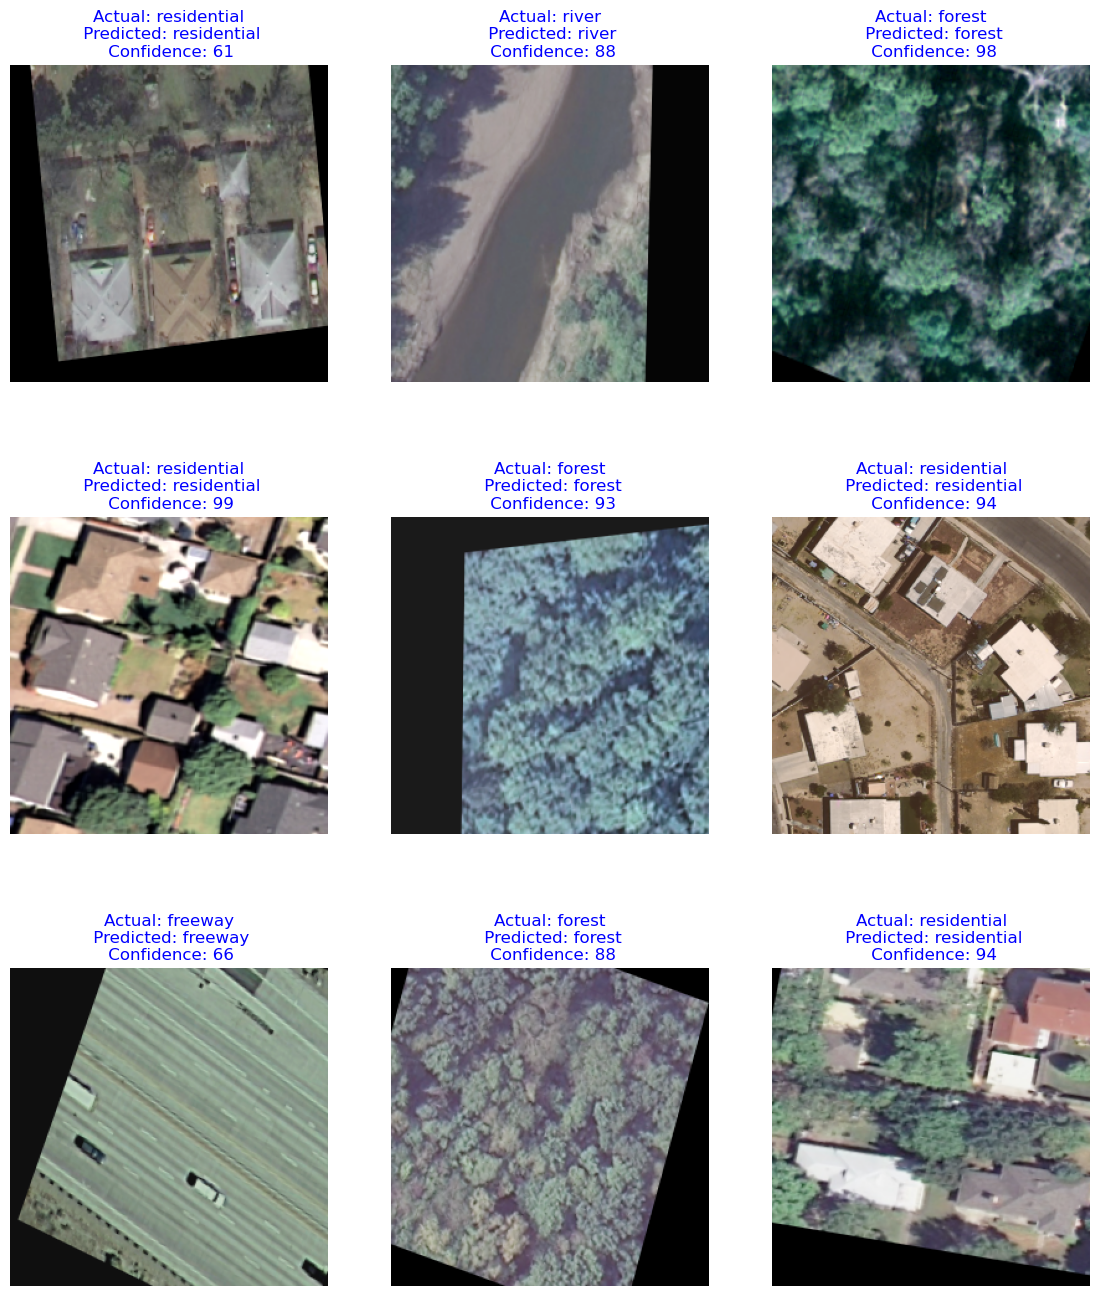

In [49]:
for batch_image, batch_label in Test_data.take(1):
    predictions_label = model.predict(batch_image)
    plt.figure(figsize=(16,16))
    
    for i in range (9):
        # i = np.random.choice(8)
        
        ax = plt.subplot(3, 3, i+1)
        plt.subplots_adjust(bottom=0.1, right = 0.8, top = 0.9)
        img = batch_image[i].numpy().astype('uint8')
        lbl_actual = classes[np.argmax(batch_label[i])] 
        lbl_pred = classes[np.argmax(predictions_label[i])]
        confidence = round((100 * np.max(predictions_label[i])))
        
        if (lbl_pred == lbl_actual):
            plt.title(f'Actual: {lbl_actual}\n Predicted: {lbl_pred}\n Confidence: {confidence}', color='blue')
        else:
            plt.title(f'Actual: {lbl_actual}\n Predicted: {lbl_pred}\n Confidence: {confidence}', color='red')
        plt.imshow(img)
        plt.axis('off')